# SWVL - Analysis of the drop in  search conversion over recent 2 weeks

### Import Libraries

In [1]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the search data file
searches = pd.read_csv("sample_searches.csv")
segments = pd.read_csv("sample_segments.csv")
bookings = pd.read_csv("sample_bookings.csv")

In [383]:
#obtain the number of records and features
#print(searches.shape)
searches.head()

,session_id,search_id,user_id,search_city,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,user_device_os,user_device_app_version
0,7c80fae5-210c-4ace-a5df-5221d6a5a008,6d2b4ed4-88bf-47bb-95fd-0bbecd824775,5cfe072e5612de0019c6f4b5,New York,2020-02-24 13:36:19.625 UTC,4,True,600.0,1440.0,3336.0,0,android,291.0
1,27e49e8d-fd08-45e1-9b69-a3979bcb2fcb,2743ce8a-6f00-4af6-931e-35ba272ae55a,5bec3404b5d05900188c824e,New York,2019-11-06 14:27:16.451 UTC,40,True,300.0,10740.0,1622.5,1,android,280.0
2,a615f255-8b71-4d5e-86e5-b529a8932f98,ad262947-40bf-4d69-8af5-a0ed0df3d7ce,5d84f5b80143a0001a8a5469,New York,2020-02-27 14:44:14.513 UTC,10,True,960.0,1320.0,3685.0,0,android,291.0
3,14fbc27c-a7cd-41ea-8f5a-4df4bd9309a5,ca2f00ab-0bc0-470d-8ff8-2264b622f9a2,5c339f5fb537b60019325625,New York,2019-12-05 17:00:39.381 UTC,40,True,660.0,1260.0,4516.5,0,android,285.0
4,c6345da5-850c-4975-89a3-ecc0f55b8914,7b9e5aee-101d-455b-a92d-d8b2b019c8db,5c995c91ade3f8001a34d524,New York,2019-12-10 01:06:36.255 UTC,10,True,0.0,1740.0,5056.5,0,android,286.0


In [3]:
print("size of searches dataset :",searches.shape)
print("size of bookings dataset :", bookings.shape )
print("size of segments dataset :",segments.shape)


size of searches dataset : (103143, 13)
size of bookings dataset : (101879, 3)
size of segments dataset : (1048575, 3)


### Data Preprocessing

### Null values imputation using mean

In [4]:
#check for null values
print(searches.isnull().sum())

session_id                      0
search_id                       0
user_id                         0
search_city                     0
search_time                     0
num_of_results                  0
is_result                       0
median_pickup_walk_time     25372
median_dropoff_walk_time    25372
median_bus_travel_time      23733
high_demand_val                 0
user_device_os                 49
user_device_app_version        49
dtype: int64


In [5]:
#imputation using mean

searches['median_pickup_walk_time'].fillna(searches['median_pickup_walk_time'].median(),inplace=True)
searches['median_dropoff_walk_time'].fillna(searches['median_dropoff_walk_time'].median(),inplace=True)
searches['median_bus_travel_time'].fillna(searches['median_bus_travel_time'].median(),inplace=True)

print("\n After imputation \n",searches.isnull().sum())


 After imputation 
 session_id                   0
search_id                    0
user_id                      0
search_city                  0
search_time                  0
num_of_results               0
is_result                    0
median_pickup_walk_time      0
median_dropoff_walk_time     0
median_bus_travel_time       0
high_demand_val              0
user_device_os              49
user_device_app_version     49
dtype: int64


In [6]:
#column details
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103143 entries, 0 to 103142
Data columns (total 13 columns):
session_id                  103143 non-null object
search_id                   103143 non-null object
user_id                     103143 non-null object
search_city                 103143 non-null object
search_time                 103143 non-null object
num_of_results              103143 non-null int64
is_result                   103143 non-null bool
median_pickup_walk_time     103143 non-null float64
median_dropoff_walk_time    103143 non-null float64
median_bus_travel_time      103143 non-null float64
high_demand_val             103143 non-null int64
user_device_os              103094 non-null object
user_device_app_version     103094 non-null float64
dtypes: bool(1), float64(4), int64(2), object(6)
memory usage: 9.5+ MB


### Check for balanced dataset - count unique values of target column

In [8]:
#unique values for is_result
print(searches['is_result'].value_counts())
print("\n")

True     79410
False    23733
Name: is_result, dtype: int64




### Feature selection-Drop fields

In [9]:
searches =searches.drop(['user_device_app_version','user_device_os','search_city'],axis=1)

### Join the dataframes

##### searches that were converted to bookings

In [10]:
#rename the columns
bookings.columns=['session_id','booking_id','booking_timestamp']


In [11]:
#check null
print(bookings.isnull().sum())

session_id             0
booking_id             0
booking_timestamp    462
dtype: int64


In [12]:
#impution with mode
bookings.fillna(bookings['booking_timestamp'].mode().values[0],inplace=True)

2019-06-03 02:25:03.008 UTC


### searched and no bookings

In [15]:
#inner join on searches and bookings data 
df1 = pd.merge( searches, bookings, how="inner",on='session_id')
#search_book.head()    
search_book.shape

(982, 12)

In [17]:
#searches not converted to bookings
df2=pd.merge(searches,bookings,on=['session_id'],how="outer",indicator=True)
df2=df2[df2['_merge']=='left_only']
df2.shape

(102162, 13)

In [23]:
df2.head()

,session_id,search_id,user_id,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,booking_id,booking_timestamp,_merge,userid,sessionid,searchid,date
0,7c80fae5-210c-4ace-a5df-5221d6a5a008,6d2b4ed4-88bf-47bb-95fd-0bbecd824775,5cfe072e5612de0019c6f4b5,2020-02-24 13:36:19.625 UTC,4.0,True,600.0,1440.0,3336.0,0.0,NaN,NaN,left_only,28172,49692,43831,2020-02-24 13:36:19.625000+00:00
1,27e49e8d-fd08-45e1-9b69-a3979bcb2fcb,2743ce8a-6f00-4af6-931e-35ba272ae55a,5bec3404b5d05900188c824e,2019-11-06 14:27:16.451 UTC,40.0,True,300.0,10740.0,1622.5,1.0,NaN,NaN,left_only,15524,15998,15771,2019-11-06 14:27:16.451000+00:00
2,a615f255-8b71-4d5e-86e5-b529a8932f98,ad262947-40bf-4d69-8af5-a0ed0df3d7ce,5d84f5b80143a0001a8a5469,2020-02-27 14:44:14.513 UTC,10.0,True,960.0,1320.0,3685.0,0.0,NaN,NaN,left_only,36305,66341,69157,2020-02-27 14:44:14.513000+00:00
3,14fbc27c-a7cd-41ea-8f5a-4df4bd9309a5,ca2f00ab-0bc0-470d-8ff8-2264b622f9a2,5c339f5fb537b60019325625,2019-12-05 17:00:39.381 UTC,40.0,True,660.0,1260.0,4516.5,0.0,NaN,NaN,left_only,19100,8442,80802,2019-12-05 17:00:39.381000+00:00
4,c6345da5-850c-4975-89a3-ecc0f55b8914,7b9e5aee-101d-455b-a92d-d8b2b019c8db,5c995c91ade3f8001a34d524,2019-12-10 01:06:36.255 UTC,10.0,True,0.0,1740.0,5056.5,0.0,NaN,NaN,left_only,23839,79187,49620,2019-12-10 01:06:36.255000+00:00


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102162 entries, 0 to 103143
Data columns (total 13 columns):
session_id                  102162 non-null object
search_id                   102162 non-null object
user_id                     102162 non-null object
search_time                 102162 non-null object
num_of_results              102162 non-null float64
is_result                   102162 non-null object
median_pickup_walk_time     102162 non-null float64
median_dropoff_walk_time    102162 non-null float64
median_bus_travel_time      102162 non-null float64
high_demand_val             102162 non-null float64
booking_id                  0 non-null object
booking_timestamp           0 non-null object
_merge                      102162 non-null category
dtypes: category(1), float64(5), object(7)
memory usage: 10.2+ MB


### Encoding categorical fields

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['userid'] = le.fit_transform(df2['user_id'])
df2['sessionid'] = le.fit_transform(df2['session_id'])
df2['searchid'] = le.fit_transform(df2['search_id'])

### Convert search_time to DateTime format

In [24]:
#convert search_time
datetime = pd.to_datetime(df2['search_time'])

In [25]:
df2['date'] = pd.to_datetime(searches['search_time'])
df2['year']= pd.DatetimeIndex(datetime).year
df2['month']= pd.DatetimeIndex(datetime).month
df2['day']= pd.DatetimeIndex(datetime).day
df2['hour']= pd.DatetimeIndex(datetime).hour
df2['minute']= pd.DatetimeIndex(datetime).minute

In [26]:
df2.head()

,session_id,search_id,user_id,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,...,_merge,userid,sessionid,searchid,date,year,month,day,hour,minute
0,7c80fae5-210c-4ace-a5df-5221d6a5a008,6d2b4ed4-88bf-47bb-95fd-0bbecd824775,5cfe072e5612de0019c6f4b5,2020-02-24 13:36:19.625 UTC,4.0,True,600.0,1440.0,3336.0,0.0,...,left_only,28172,49692,43831,2020-02-24 13:36:19.625000+00:00,2020,2,24,13,36
1,27e49e8d-fd08-45e1-9b69-a3979bcb2fcb,2743ce8a-6f00-4af6-931e-35ba272ae55a,5bec3404b5d05900188c824e,2019-11-06 14:27:16.451 UTC,40.0,True,300.0,10740.0,1622.5,1.0,...,left_only,15524,15998,15771,2019-11-06 14:27:16.451000+00:00,2019,11,6,14,27
2,a615f255-8b71-4d5e-86e5-b529a8932f98,ad262947-40bf-4d69-8af5-a0ed0df3d7ce,5d84f5b80143a0001a8a5469,2020-02-27 14:44:14.513 UTC,10.0,True,960.0,1320.0,3685.0,0.0,...,left_only,36305,66341,69157,2020-02-27 14:44:14.513000+00:00,2020,2,27,14,44
3,14fbc27c-a7cd-41ea-8f5a-4df4bd9309a5,ca2f00ab-0bc0-470d-8ff8-2264b622f9a2,5c339f5fb537b60019325625,2019-12-05 17:00:39.381 UTC,40.0,True,660.0,1260.0,4516.5,0.0,...,left_only,19100,8442,80802,2019-12-05 17:00:39.381000+00:00,2019,12,5,17,0
4,c6345da5-850c-4975-89a3-ecc0f55b8914,7b9e5aee-101d-455b-a92d-d8b2b019c8db,5c995c91ade3f8001a34d524,2019-12-10 01:06:36.255 UTC,10.0,True,0.0,1740.0,5056.5,0.0,...,left_only,23839,79187,49620,2019-12-10 01:06:36.255000+00:00,2019,12,10,1,6


In [28]:
df2.drop(['session_id', 'search_id', 'user_id','booking_id','booking_timestamp', '_merge'],inplace=True,axis=1)

In [31]:
df2.head()

,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,userid,sessionid,searchid,date,year,month,day,hour,minute
0,2020-02-24 13:36:19.625 UTC,4.0,True,600.0,1440.0,3336.0,0.0,28172,49692,43831,2020-02-24 13:36:19.625000+00:00,2020,2,24,13,36
1,2019-11-06 14:27:16.451 UTC,40.0,True,300.0,10740.0,1622.5,1.0,15524,15998,15771,2019-11-06 14:27:16.451000+00:00,2019,11,6,14,27
2,2020-02-27 14:44:14.513 UTC,10.0,True,960.0,1320.0,3685.0,0.0,36305,66341,69157,2020-02-27 14:44:14.513000+00:00,2020,2,27,14,44
3,2019-12-05 17:00:39.381 UTC,40.0,True,660.0,1260.0,4516.5,0.0,19100,8442,80802,2019-12-05 17:00:39.381000+00:00,2019,12,5,17,0
4,2019-12-10 01:06:36.255 UTC,10.0,True,0.0,1740.0,5056.5,0.0,23839,79187,49620,2019-12-10 01:06:36.255000+00:00,2019,12,10,1,6


In [34]:
df2['is_result']= df2.is_result.map({True:1,False:0})
df2.head()

,search_time,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,userid,sessionid,searchid,date,year,month,day,hour,minute
0,2020-02-24 13:36:19.625 UTC,4.0,1,600.0,1440.0,3336.0,0.0,28172,49692,43831,2020-02-24 13:36:19.625000+00:00,2020,2,24,13,36
1,2019-11-06 14:27:16.451 UTC,40.0,1,300.0,10740.0,1622.5,1.0,15524,15998,15771,2019-11-06 14:27:16.451000+00:00,2019,11,6,14,27
2,2020-02-27 14:44:14.513 UTC,10.0,1,960.0,1320.0,3685.0,0.0,36305,66341,69157,2020-02-27 14:44:14.513000+00:00,2020,2,27,14,44
3,2019-12-05 17:00:39.381 UTC,40.0,1,660.0,1260.0,4516.5,0.0,19100,8442,80802,2019-12-05 17:00:39.381000+00:00,2019,12,5,17,0
4,2019-12-10 01:06:36.255 UTC,10.0,1,0.0,1740.0,5056.5,0.0,23839,79187,49620,2019-12-10 01:06:36.255000+00:00,2019,12,10,1,6


## Analysis of  search  data which dint result in booking

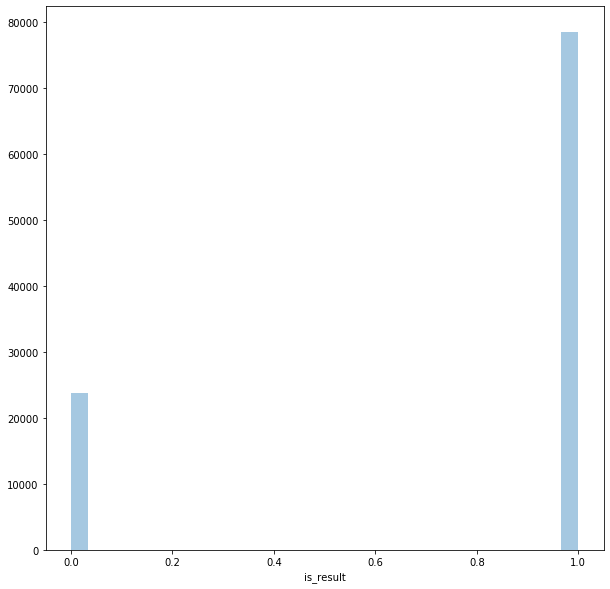

In [42]:
#distribution of is_result feature
plt.figure(figsize=(10,10))
sns.distplot(df2['is_result'],kde=False,bins=30)

from the graph it is clear that majority of times the search result was displayed.Hence it is not a cause for the drop in conversion from search to booking 

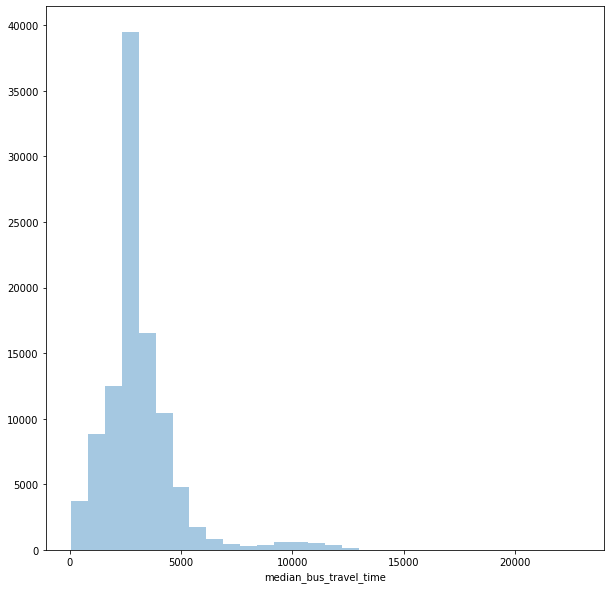

In [45]:
#distribution bus travel time 
#distribution of is_result feature
plt.figure(figsize=(10,10))
sns.distplot(df2['median_bus_travel_time'],kde=False,bins=30)

The distribution is left skewed 

In [ ]:

plt.figure(figsize=(10,10))
sns.jointplot(df2['median_pickup_walk_time'],['sessionid'],df2,kind=hex)

In [ ]:
#high demand val v/s date

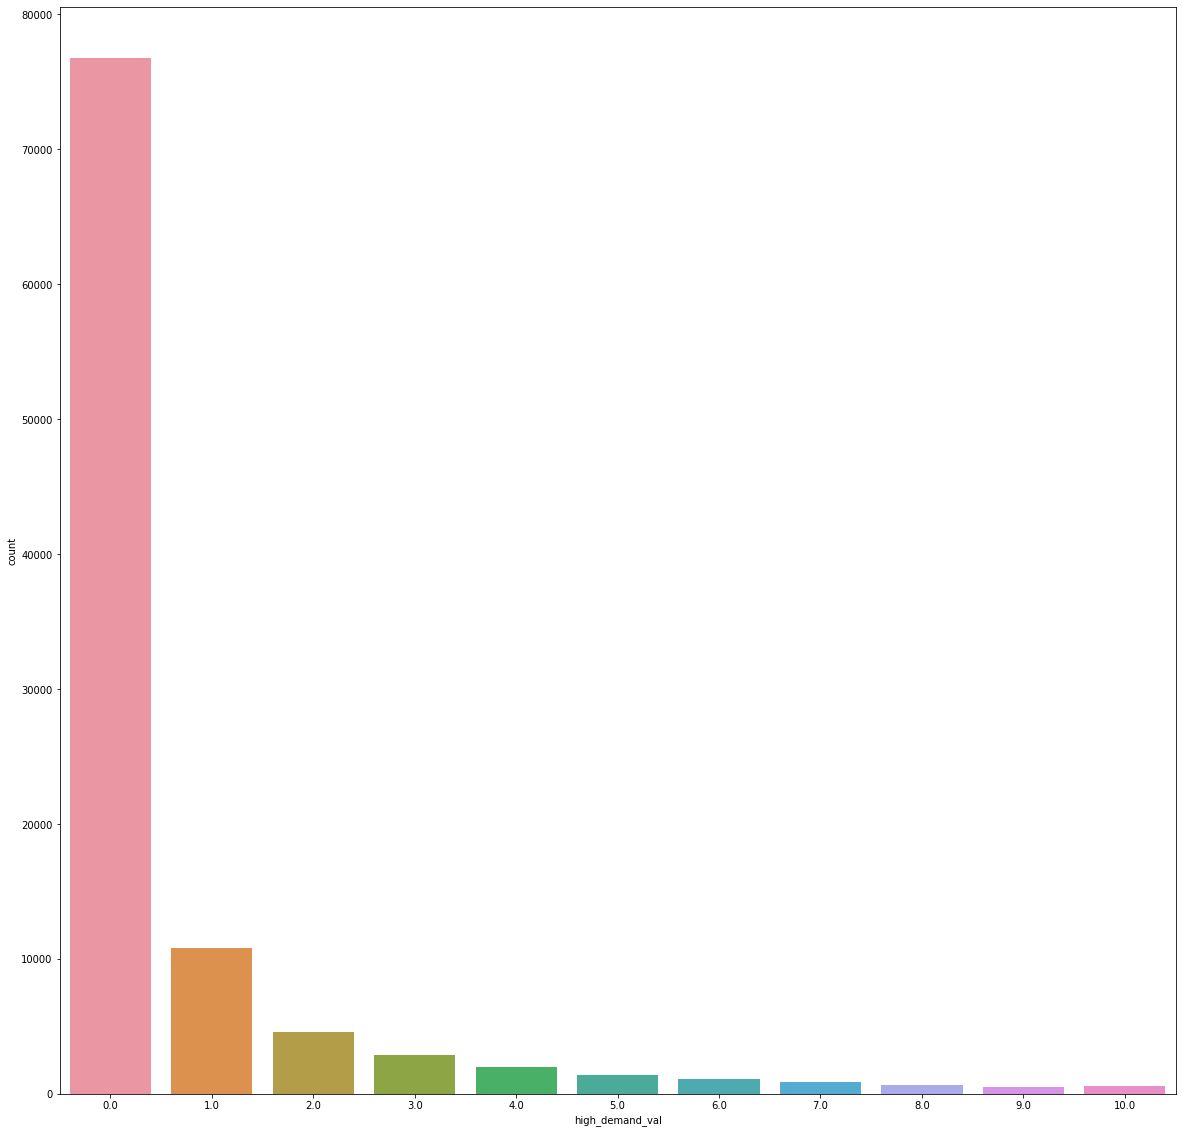

In [50]:
#count of number of search results
plt.figure(figsize=(20,20))
sns.countplot(df2['high_demand_val'])

Most of the times there are no seats as visible from the graph. This could be a driver for no search conversion.

In [ ]:
#search session v/s is result

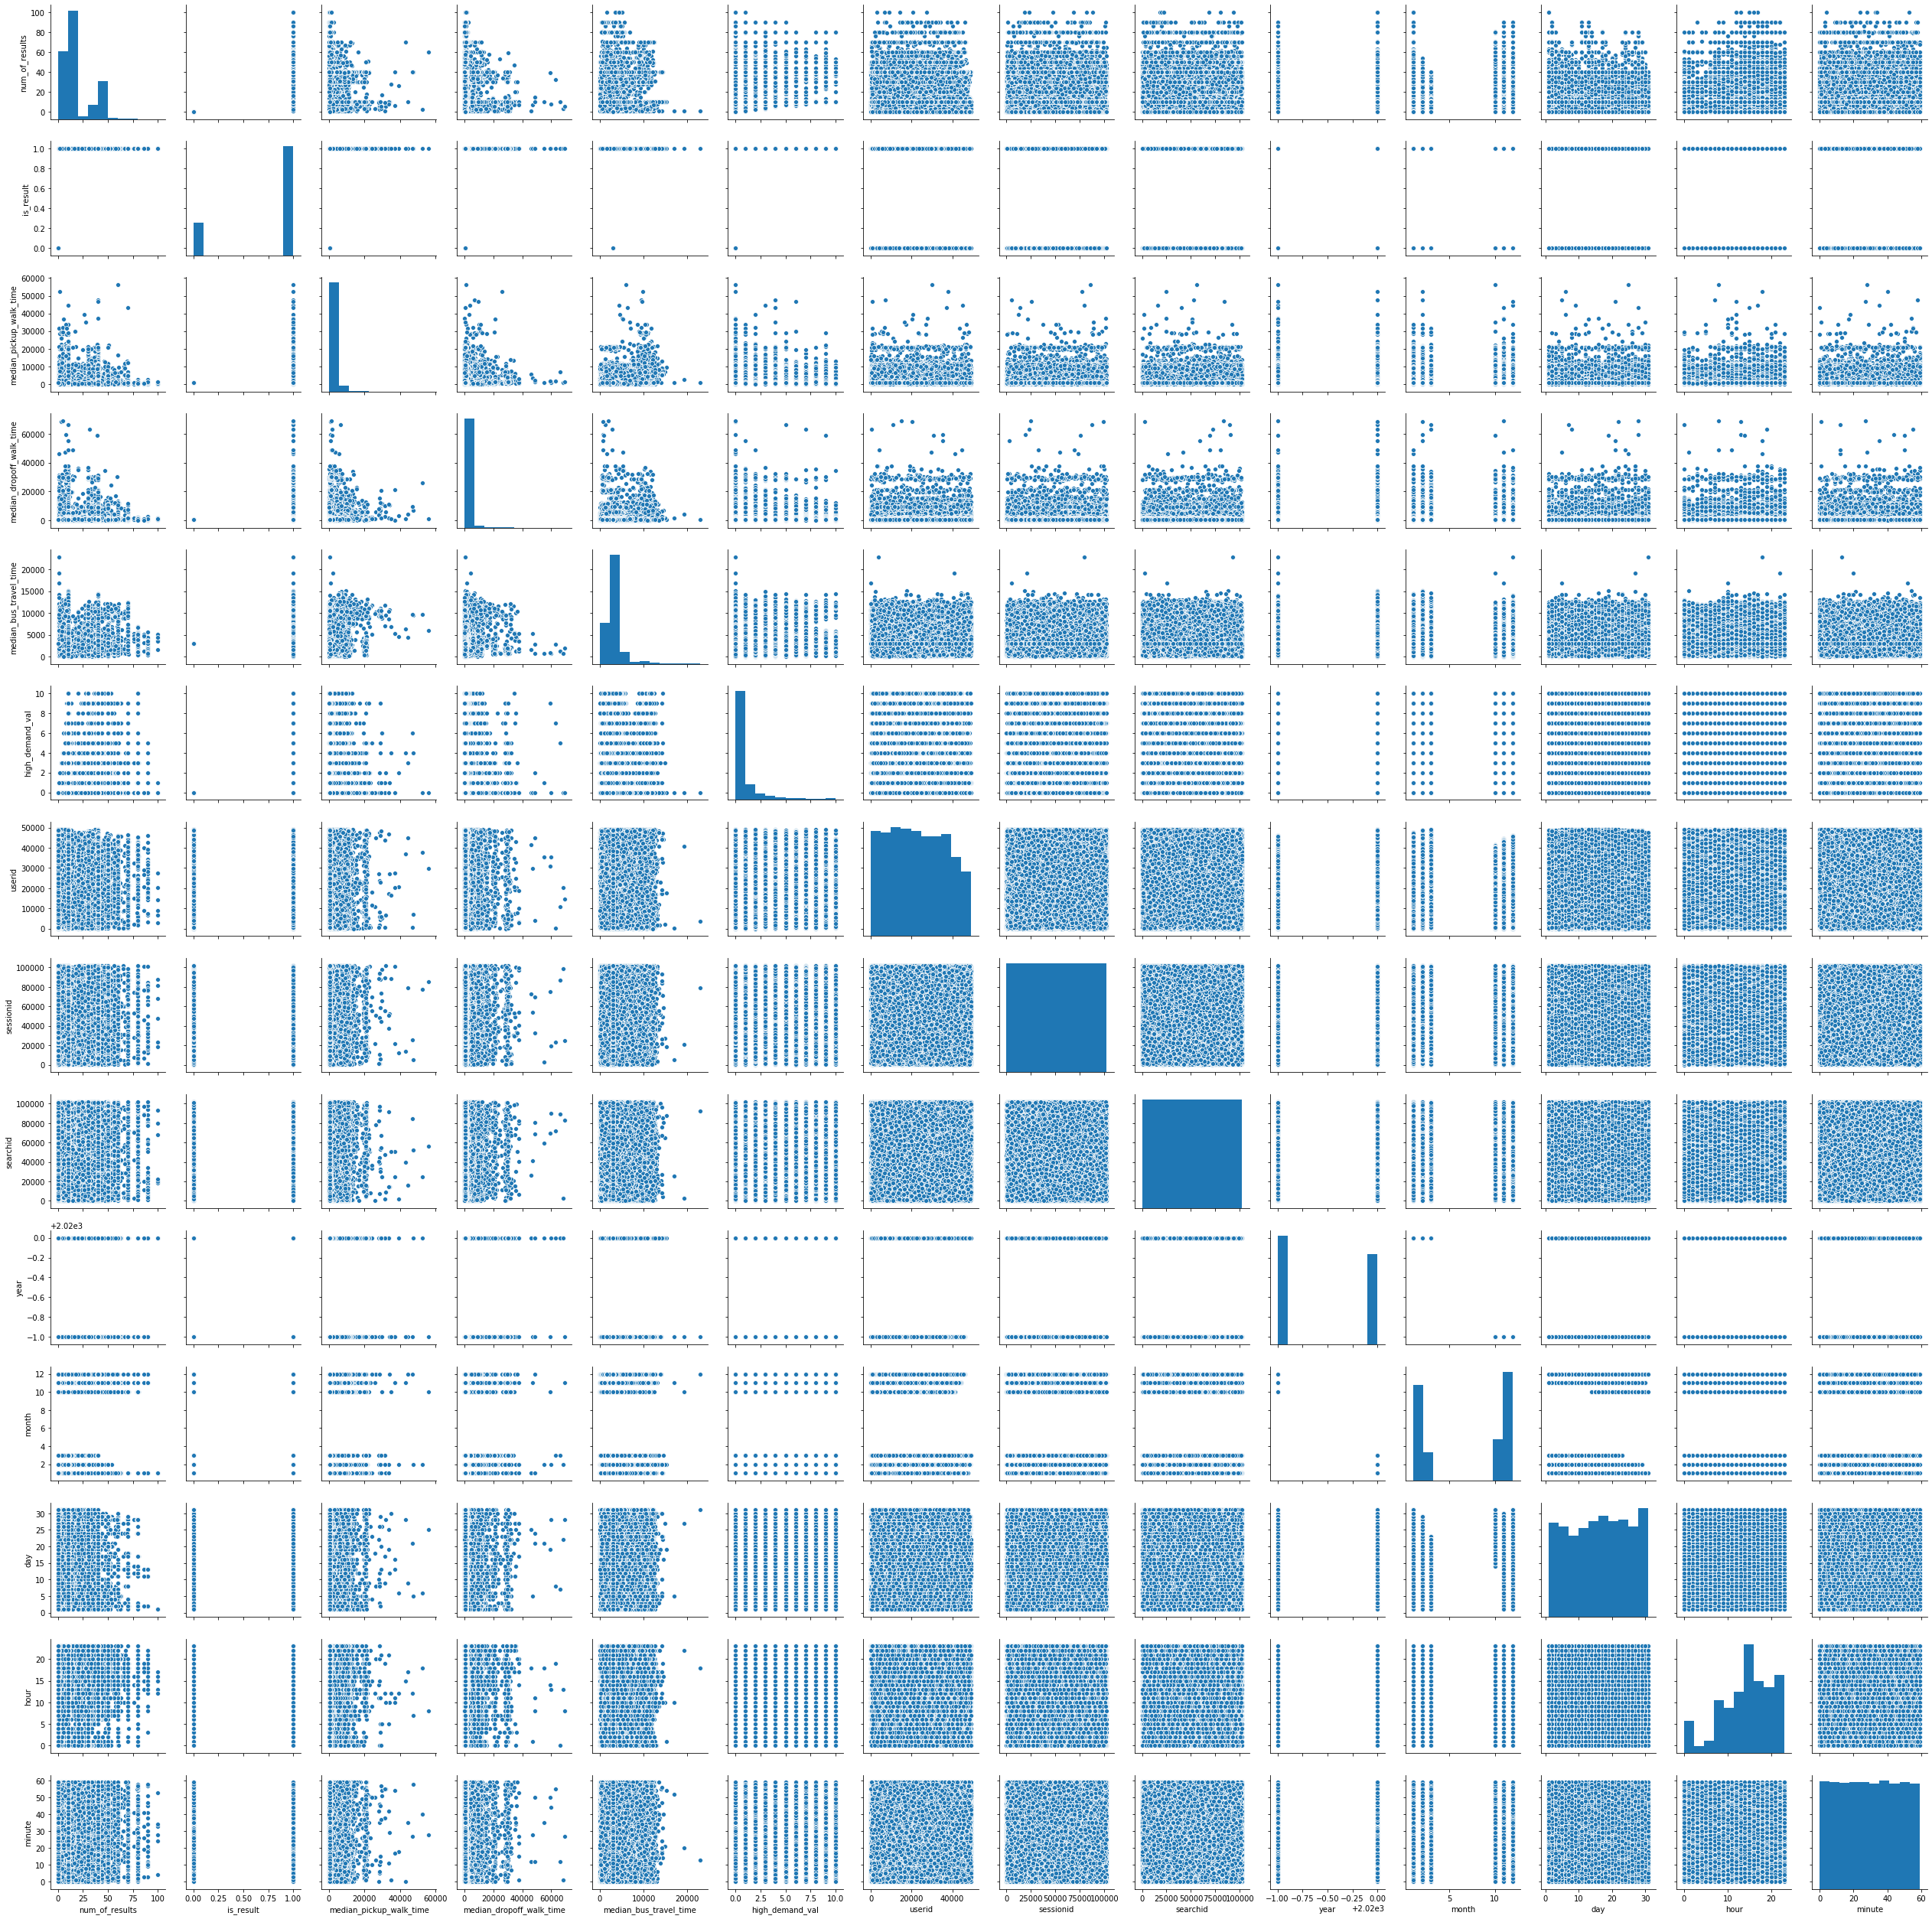

In [55]:
#pair plot

sns.pairplot(df2)

,num_of_results,is_result,median_pickup_walk_time,median_dropoff_walk_time,median_bus_travel_time,high_demand_val,userid,sessionid,searchid,year,month,day,hour,minute
num_of_results,1.000000,0.541433,0.071950,0.032288,-0.016809,0.265024,-0.058737,0.001398,-0.000328,-0.243709,0.231779,0.000203,-0.017621,-0.000283
is_result,0.541433,1.000000,0.162996,0.105421,0.049005,0.227952,-0.055710,-0.002760,-0.002814,-0.025560,0.027696,-0.034581,-0.078985,-0.000431
median_pickup_walk_time,0.071950,0.162996,1.000000,0.105839,0.135926,0.024312,-0.017584,-0.000112,-0.000699,0.013443,-0.011931,-0.002466,-0.042099,0.002033
median_dropoff_walk_time,0.032288,0.105421,0.105839,1.000000,0.228253,0.072530,0.007682,-0.002137,0.003092,0.030515,-0.028793,0.001435,-0.015701,0.008553
median_bus_travel_time,-0.016809,0.049005,0.135926,0.228253,1.000000,0.031894,0.048601,0.000702,0.000282,0.075833,-0.070056,-0.017243,-0.005217,-0.000447
high_demand_val,0.265024,0.227952,0.024312,0.072530,0.031894,1.000000,-0.001056,-0.002532,0.000368,-0.131333,0.114160,-0.002408,-0.105613,-0.003923
userid,-0.058737,-0.055710,-0.017584,0.007682,0.048601,-0.001056,1.000000,-0.005219,-0.004352,0.031186,-0.025809,-0.007032,-0.000072,0.000315
sessionid,0.001398,-0.002760,-0.000112,-0.002137,0.000702,-0.002532,-0.005219,1.000000,0.001542,-0.000119,-0.000247,-0.000649,-0.000391,-0.003247
searchid,-0.000328,-0.002814,-0.000699,0.003092,0.000282,0.000368,-0.004352,0.001542,1.000000,0.004020,-0.004249,-0.000062,-0.003379,-0.000774
year,-0.243709,-0.025560,0.013443,0.030515,0.075833,-0.131333,0.031186,-0.000119,0.004020,1.000000,-0.986307,-0.135817,-0.004240,-0.002816


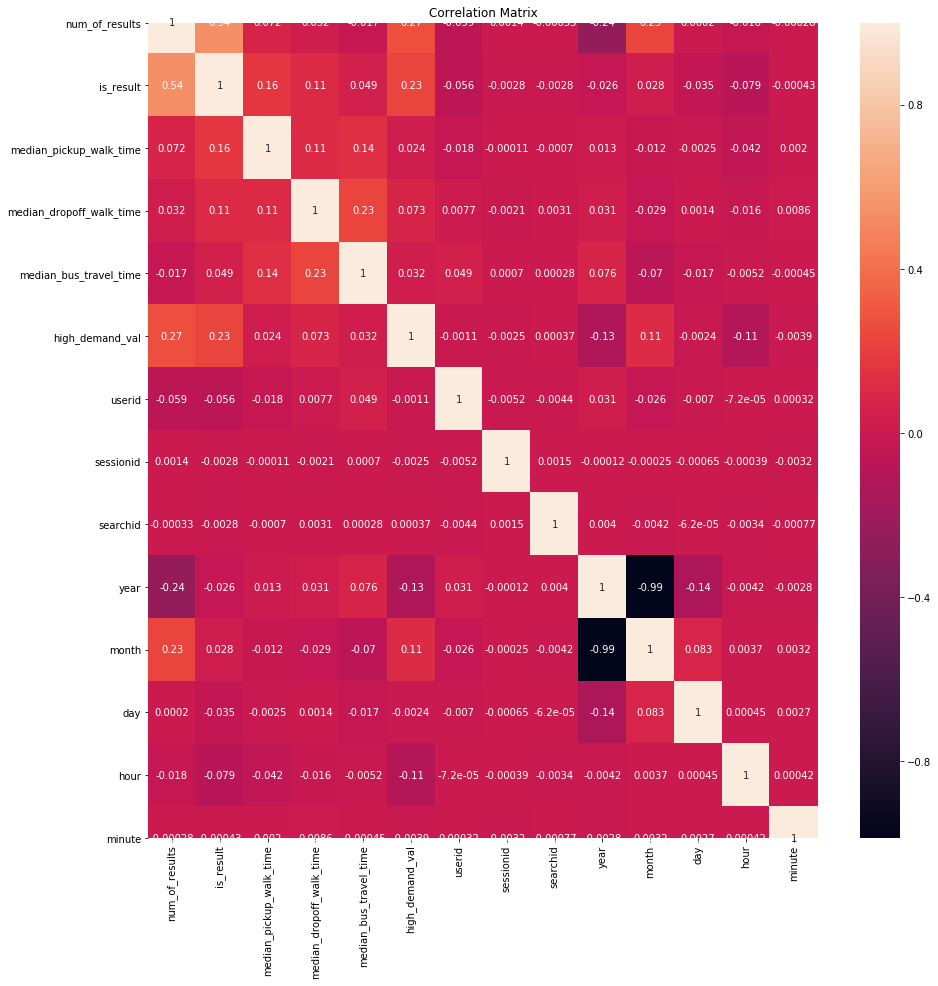

In [53]:
#correlation matrix
corrmat= df2.corr()

plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(corrmat,annot=True)


#display important features using Extra Trees regressor
corrmat

There can be positive and negative correlations.Let us assume is_result is our target variable

### Group by year and month 

In [ ]:
grp1 = df2.groupby(['year','month']).groups


grp2 = df.groupby(['year','month'])

print(grp2)

In [ ]:
## Plot for last 2 months the number of results returned for the search ids